In [1]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
import seaborn as sns

In [2]:
# Mount Google Drive for reading and writing files
drive.mount('/content/drive')
os.chdir("drive/My Drive/PROJECT/HealthCare/FINAL_RESULTS/")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Read in data
df = pd.read_excel('./LSTM-ATT_outbreaks.xlsx')
print(df)

     Province           Metric     Score
0   Điện Biên    True Positive  0.000000
1   Điện Biên   False Positive  0.000000
2   Điện Biên  Actual Positive  0.000000
3   Điện Biên        Precision       NaN
4   Điện Biên         Accuracy  1.000000
5   Điện Biên      Sensitivity       NaN
6   Điện Biên      Specificity  1.000000
7   Thái Bình    True Positive  0.000000
8   Thái Bình   False Positive  0.000000
9   Thái Bình  Actual Positive  0.000000
10  Thái Bình        Precision       NaN
11  Thái Bình         Accuracy  1.000000
12  Thái Bình      Sensitivity       NaN
13  Thái Bình      Specificity  1.000000
14    Lào Cai    True Positive  0.000000
15    Lào Cai   False Positive  1.000000
16    Lào Cai  Actual Positive  1.000000
17    Lào Cai        Precision  0.000000
18    Lào Cai         Accuracy  0.944444
19    Lào Cai      Sensitivity  0.000000
20    Lào Cai      Specificity  0.971429
21    Kon Tum    True Positive  0.000000
22    Kon Tum   False Positive  0.000000
23    Kon Tum  A

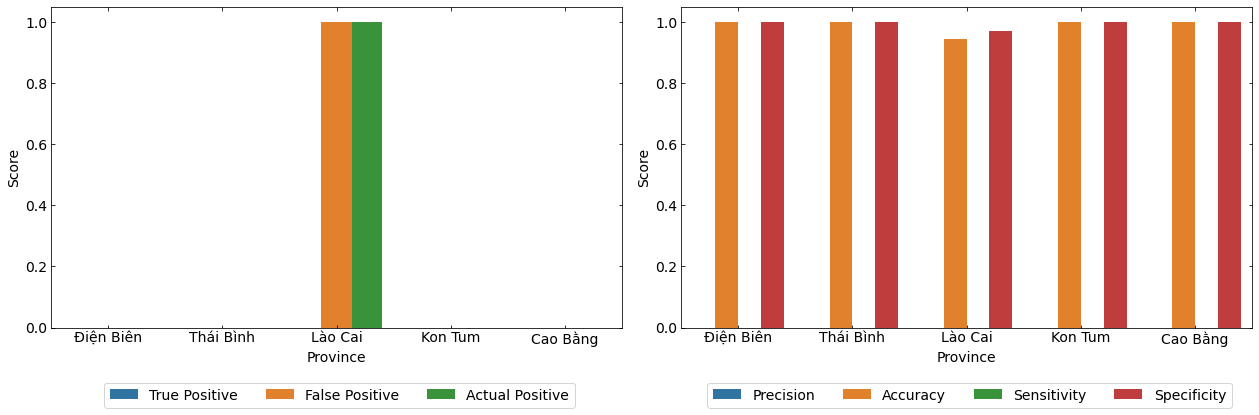

In [4]:
# Plot style
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['figure.figsize'] = [18.0, 6.0]
plt.rcParams['font.size'] = 14

# Split data into relevant metrics for each of the two plots
df1 = df[df["Metric"].isin(['True Positive', 'False Positive', 'Actual Positive'])]
df2 = df[df["Metric"].isin(['Precision', 'Accuracy', 'Sensitivity', 'Specificity'])]

# Set up plot grid to allow multiple plots in one figure
fig = plt.figure()
AX = gridspec.GridSpec(2,6)
# AX.update(wspace = 3, hspace = 0.75)
ax1  = plt.subplot(AX[:,0:3])
ax2 = plt.subplot(AX[:,3:6])

# Create two barplots, remove legends to add custom legend later
g1 = sns.barplot(x='Province', y="Score", hue="Metric", data=df1, ax=ax1)
g2 = sns.barplot(x='Province', y="Score", hue="Metric", data=df2, ax=ax2)
g1.legend_.remove()
g2.legend_.remove()

# Add in legends below plots
ax1.legend(loc='upper center', bbox_to_anchor=(0.505, -0.15), shadow=False, ncol=3)
ax2.legend(loc='upper center', bbox_to_anchor=(0.505, -0.15), shadow=False, ncol=4)

# Plot and save
plt.grid(False)
plt.tight_layout()
# plt.savefig('LSTM-ATT_outbreaks.png', dpi = 300)
plt.show()

In [5]:
# Read in data for multi-month predictions
month_2 = pd.read_excel('./LSTM-ATT_outbreaks.xlsx', sheet_name='2-month')
month_3 = pd.read_excel('./LSTM-ATT_outbreaks.xlsx', sheet_name='3-month')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


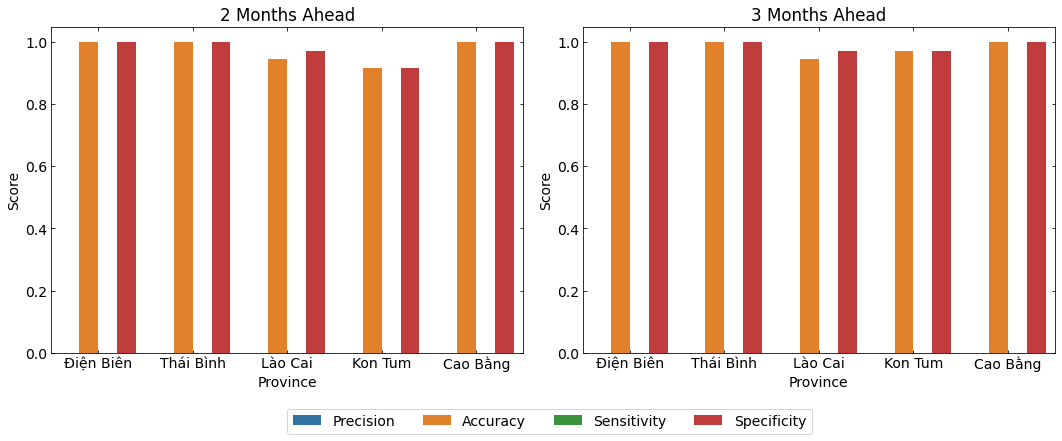

In [6]:
# Plot style
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['figure.figsize'] = [20.0, 6.0]
plt.rcParams['font.size'] = 14

# Set up plot grid to allow multiple plots in one figure
fig = plt.figure()
AX = gridspec.GridSpec(2,6)
AX.update(wspace = 0.5, hspace = 0.75)
ax1  = plt.subplot(AX[:,0:3])
ax2 = plt.subplot(AX[:,3:6])

# Create two barplots
g1 = sns.barplot(x='Province', y="Score", hue="Metric", data=month_2, ax=ax1)
ax1.set_title('2 Months Ahead')
g2 = sns.barplot(x='Province', y="Score", hue="Metric", data=month_3, ax=ax2)
ax2.set_title('3 Months Ahead')

# Remove legends to add custom legend after
g1.legend_.remove()
g2.legend_.remove()

# Custom legend
ax2.legend(loc='upper center', bbox_to_anchor=(-0.07, -0.15), shadow=False, ncol=4)

# Plot and save
plt.grid(False)
plt.tight_layout()
# plt.savefig('multi_month_outbreaks.png', dpi = 300)
plt.show()